## 1. Executive Summary
### Identifying and Recommending Best Restaurants – EDA

**Objective:**  
To analyze restaurant data for actionable insights supporting intelligent automation and recommendations for a B2C portal.

**Approach:**  
- Systematic data cleaning and exploration
- Visualization of key metrics (geography, ratings, services, cuisines, cost)
- Actionable business recommendations

### 1. Data Import & Setup

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os

os.makedirs('../reports/figures/', exist_ok=True)

# Load cleaned data
df = pd.read_csv('../data/processed/cleaned_data.csv')

### 2. Geographical Distribution
Cities with Max/Min Restaurants

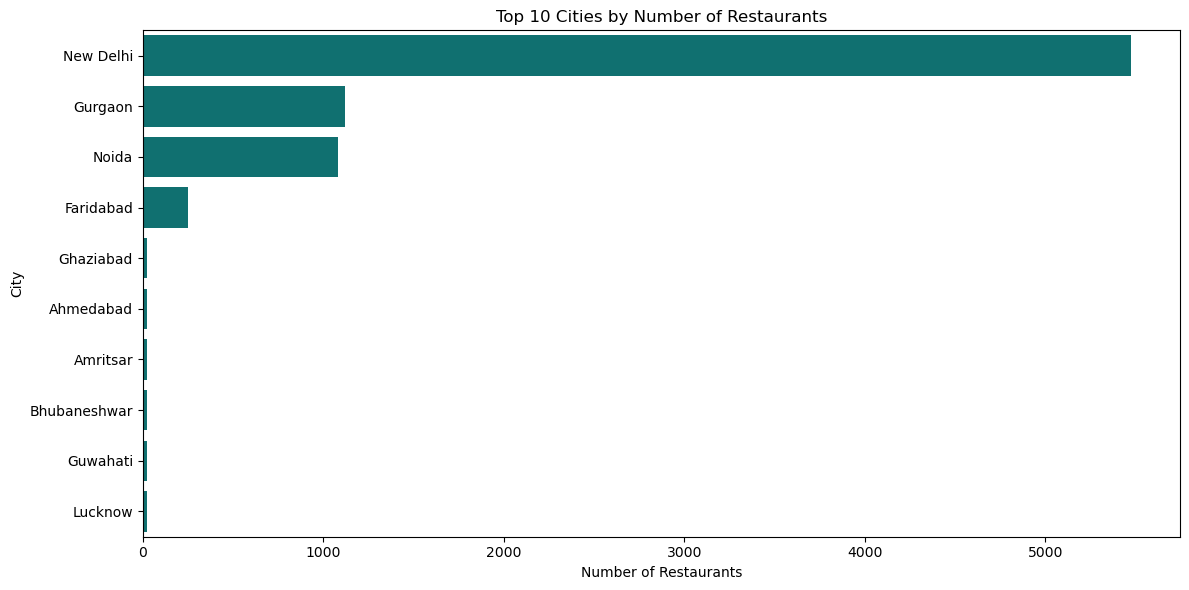

City with minimum restaurants: Bandung 1


In [21]:
city_counts = df['city'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=city_counts.head(10).values, y=city_counts.head(10).index, color='teal')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('../reports/figures/top_10_cities.png', bbox_inches='tight')
plt.show()

print("City with minimum restaurants:", city_counts.idxmin(), city_counts.min())

### 4. Ratings Distribution

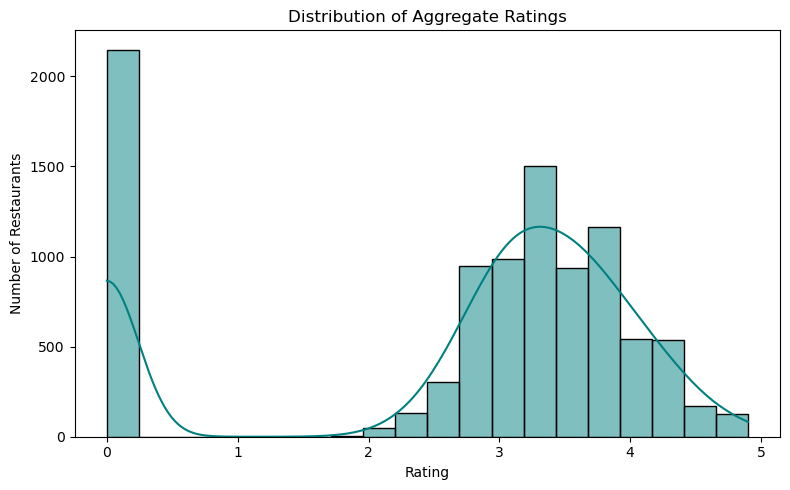

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['aggregate_rating'], bins=20, kde=True, color='teal')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.savefig('../reports/figures/ratings_distribution.png', bbox_inches='tight')
plt.show()

### 5. Franchise Analysis

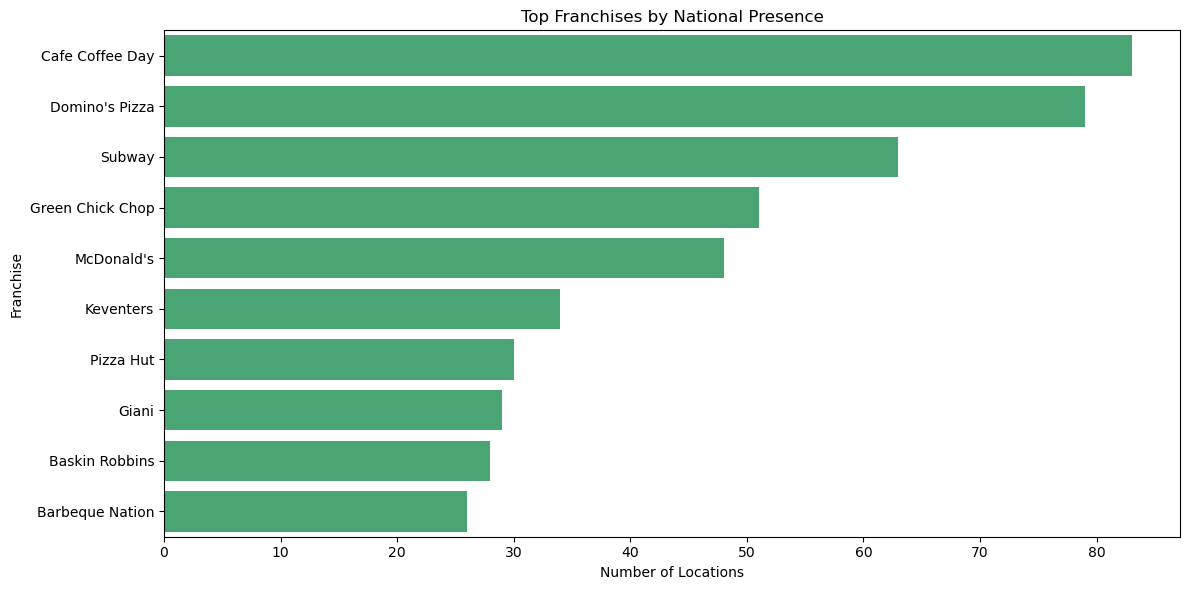

In [24]:
franchise_counts = df['restaurant_name'].value_counts()
top_franchises = franchise_counts[franchise_counts > 1].head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_franchises.values, y=top_franchises.index, color='mediumseagreen')
plt.title('Top Franchises by National Presence')
plt.xlabel('Number of Locations')
plt.ylabel('Franchise')
plt.tight_layout()
plt.savefig('../reports/figures/top_franchises.png', bbox_inches='tight')
plt.show()

### 6. Table Booking & Online Delivery

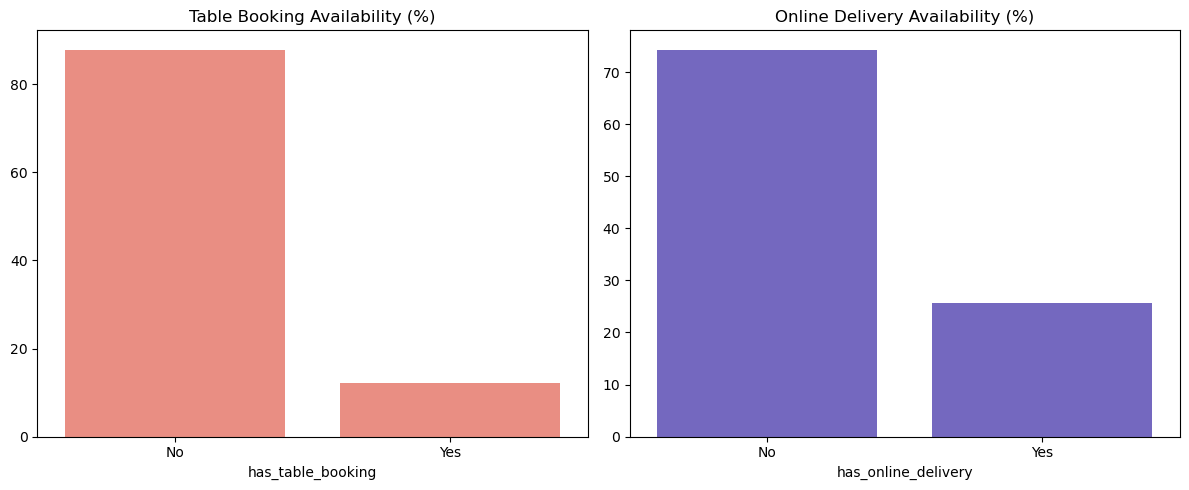

In [25]:
table_booking_ratio = df['has_table_booking'].value_counts(normalize=True) * 100
online_delivery_ratio = df['has_online_delivery'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.barplot(x=table_booking_ratio.index, y=table_booking_ratio.values, ax=ax[0], color='salmon')
ax[0].set_title('Table Booking Availability (%)')
sns.barplot(x=online_delivery_ratio.index, y=online_delivery_ratio.values, ax=ax[1], color='slateblue')
ax[1].set_title('Online Delivery Availability (%)')
plt.tight_layout()
plt.savefig('../reports/figures/table_online_availability.png', bbox_inches='tight')
plt.show()

### 7. Votes: Delivery vs Non-Delivery

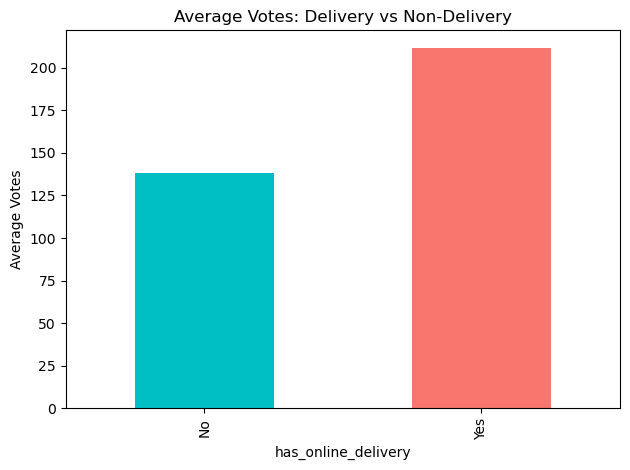

In [26]:
votes_delivery = df.groupby('has_online_delivery')['votes'].mean()
votes_delivery.plot(kind='bar', color=['#00BFC4','#F8766D'])
plt.title('Average Votes: Delivery vs Non-Delivery')
plt.ylabel('Average Votes')
plt.tight_layout()
plt.savefig('../reports/figures/votes_delivery_vs_nondelivery.png', bbox_inches='tight')
plt.show()

### 8. Top 10 Cuisines Across Cities

C:\Users\ThapeloMasebe\AppData\Local\Temp\ipykernel_43252\859426206.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.head(10).values, y=cuisine_counts.head(10).index, palette='magma')


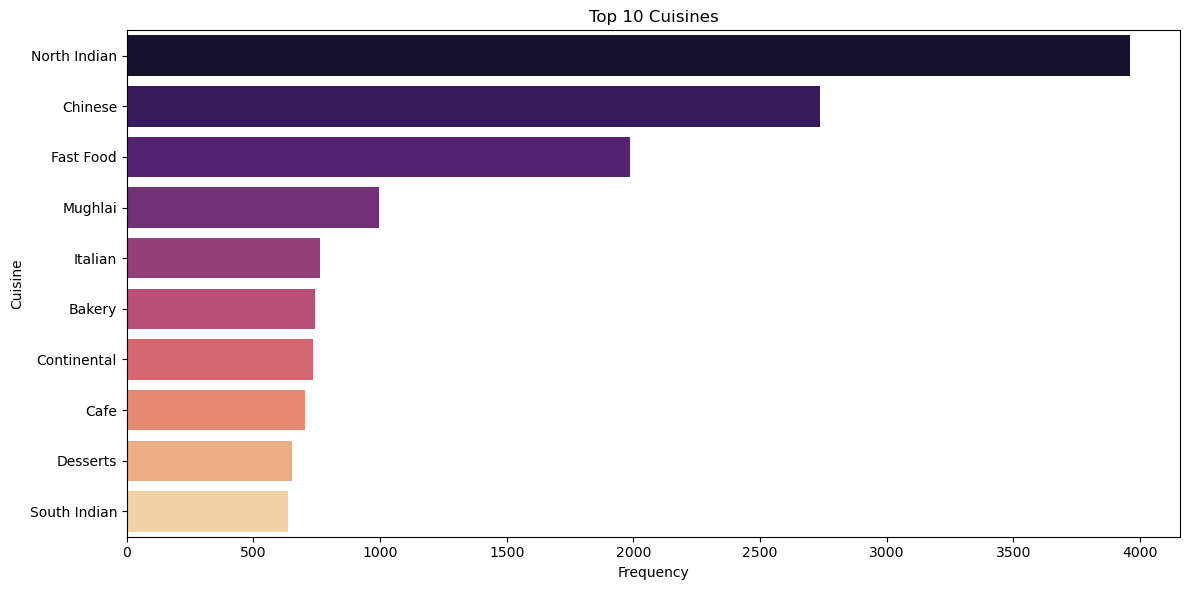

In [27]:
from collections import Counter

cuisine_list = df['cuisines'].dropna().str.split(', ')
cuisine_flat = [item for sublist in cuisine_list for item in sublist]
cuisine_counts = pd.Series(Counter(cuisine_flat)).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=cuisine_counts.head(10).values, y=cuisine_counts.head(10).index, palette='magma')
plt.title('Top 10 Cuisines')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.savefig('../reports/figures/top_10_cuisines.png', bbox_inches='tight')
plt.show()

### 9. Cuisines per Restaurant & Relationship to Ratings

Max cuisines served by a restaurant: 8
Min cuisines served by a restaurant: 1


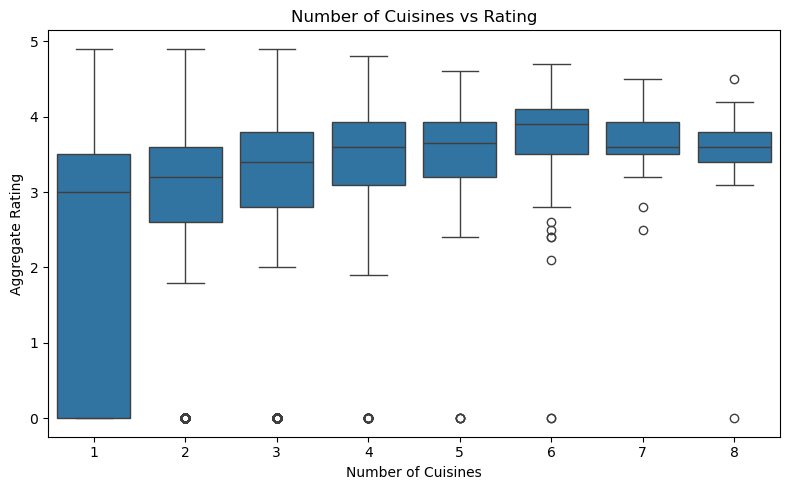

In [28]:
df['num_cuisines'] = df['cuisines'].apply(lambda x: len(str(x).split(',')))
print("Max cuisines served by a restaurant:", df['num_cuisines'].max())
print("Min cuisines served by a restaurant:", df['num_cuisines'].min())

plt.figure(figsize=(8,5))
sns.boxplot(x='num_cuisines', y='aggregate_rating', data=df)
plt.title('Number of Cuisines vs Rating')
plt.xlabel('Number of Cuisines')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.savefig('../reports/figures/cuisines_vs_rating.png', bbox_inches='tight')
plt.show()

### 10. Cost Analysis

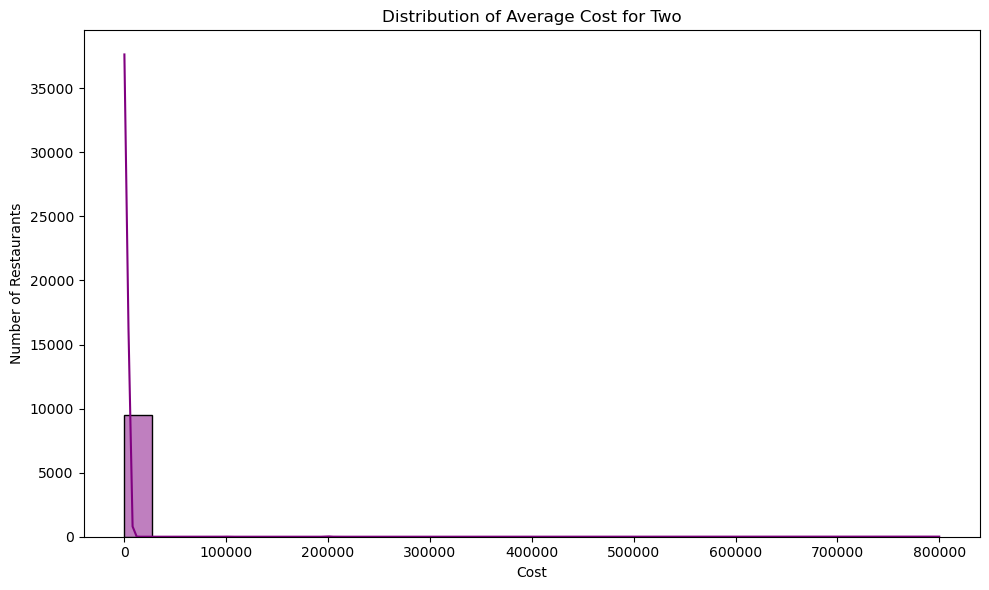

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['average_cost_for_two'], bins=30, kde=True, color='purple')
plt.title('Distribution of Average Cost for Two')
plt.xlabel('Cost')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.savefig('../reports/figures/cost_distribution.png', bbox_inches='tight')
plt.show()

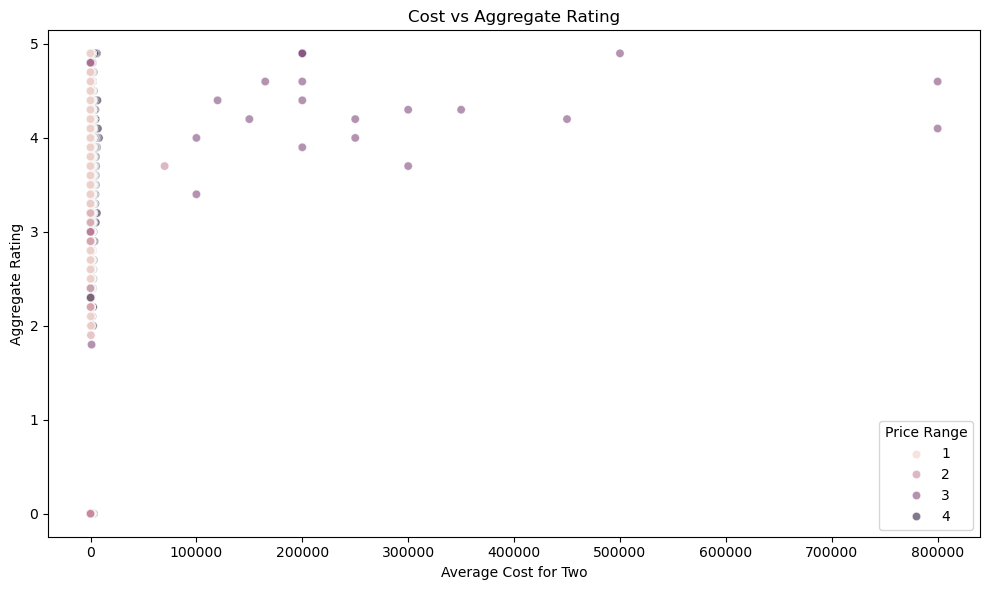

In [31]:
# Cost vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='average_cost_for_two', y='aggregate_rating', hue='price_range', alpha=0.6)
plt.title('Cost vs Aggregate Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.legend(title='Price Range')
plt.tight_layout()
plt.savefig('../reports/figures/cost_vs_rating.png', bbox_inches='tight')
plt.show()

### 11. Factors Affecting Ratings (Correlation)

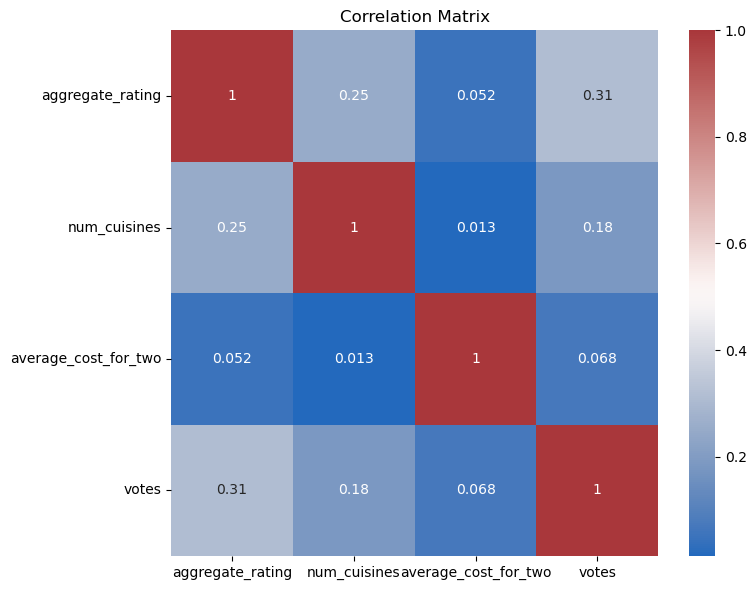

In [32]:
corr = df[['aggregate_rating','num_cuisines','average_cost_for_two','votes']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='vlag')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('../reports/figures/correlation_matrix.png', bbox_inches='tight')
plt.show()

### 12. Recommendations

### Key Insights & Recommendations

- **Target cities with high restaurant density for marketing.**
- Cities like New Delhi, Gurgaon, and Noida have the largest number of restaurants, representing vibrant markets for targeted promotions and partnerships.

- **Promote franchises with strong national presence.**
- Brands such as Cafe Coffee Day, Domino's Pizza, and Subway dominate multiple locations; leveraging their brand equity can drive both customer trust and platform adoption.

- **Focus on enabling online delivery and table booking for higher engagement.**
- Restaurants offering online delivery and table booking receive more votes and engagement, suggesting that these features are highly valued by customers.

- **Highlight popular cuisines in new campaigns.**
- North Indian, Chinese, and Fast Food are the most frequently served cuisines. Featuring these in promotional materials can attract a broad audience.

- **Use number of cuisines, cost, and votes as features for ML recommendation models.**
- These variables show correlation with ratings and engagement, making them strong ca

### 13. Appendix / Reflection (Artistic/Narrative Layer)

### Reflection

How do these patterns reflect urban taste, migration, or memory?  
What stories are hidden in the “outliers” or rare cuisines?

- The data tells a story not just of business, but of culture—how cities become culinary crossroads, how migration shapes menus, and how memory is encoded in food preferences.
- Outlier cuisines and underrepresented cities may hold unique local flavors and histories, waiting to be discovered and celebrated.
- The intersection of systematic analysis and poetic inquiry reveals both the dominant trends and the quiet exceptions that make the dining landscape rich and diverse.

> "In every row, a story; in every cluster, a community."